# Baseline Models

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Read the CSV file
df = pd.read_csv('experiment_results.csv')
df.head()

,Model,Environment,Difficulty,Run,Moves,Score
0,mixtral-8x7b-32768,env_easy,1,1,5,1
1,mixtral-8x7b-32768,env_easy,1,2,5,1
2,mixtral-8x7b-32768,env_easy,1,3,6,1
3,mixtral-8x7b-32768,env_easy,1,4,6,1
4,mixtral-8x7b-32768,env_easy,1,5,6,1


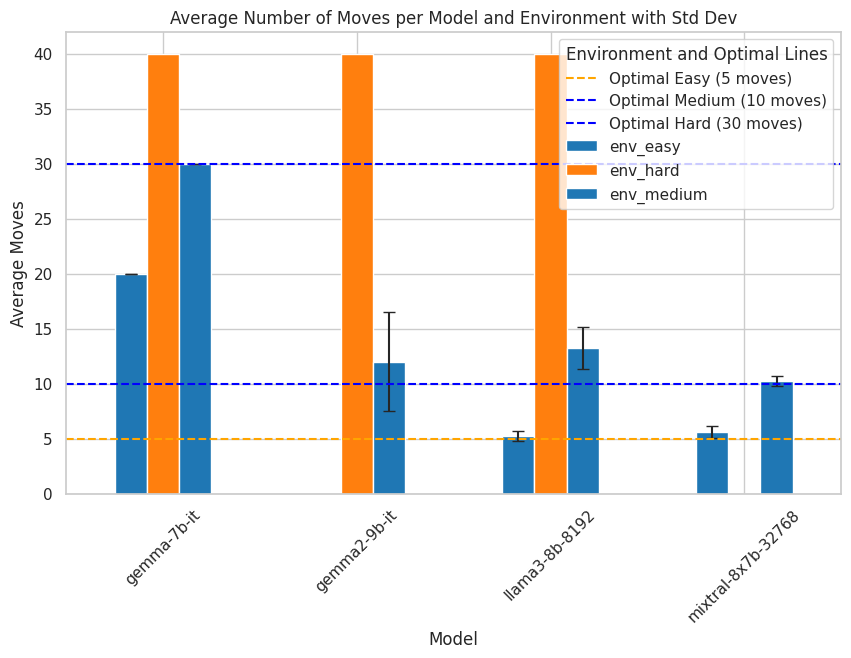

In [ ]:
# Calculate mean and standard deviation
grouped = df.groupby(['Model', 'Environment'])['Moves']
avg_moves = grouped.mean().unstack()
std_moves = grouped.std().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
avg_moves.plot(kind='bar', yerr=std_moves, ax=ax, capsize=4, color=['#1f77b4', '#ff7f0e'])

# Add horizontal lines for optimal quest lengths
optimal_easy = 5
optimal_medium = 10
optimal_hard = 30
plt.axhline(y=optimal_easy, color='orange', linestyle='--', label='Optimal Easy (5 moves)')
plt.axhline(y=optimal_medium, color='blue', linestyle='--', label='Optimal Medium (10 moves)')
plt.axhline(y=optimal_hard, color='', linestyle='--', label='Optimal Hard (30 moves)')

# Additional plot settings
plt.title('Average Number of Moves per Model and Environment with Std Dev')
plt.ylabel('Average Moves')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Environment and Optimal Lines')

plt.show()


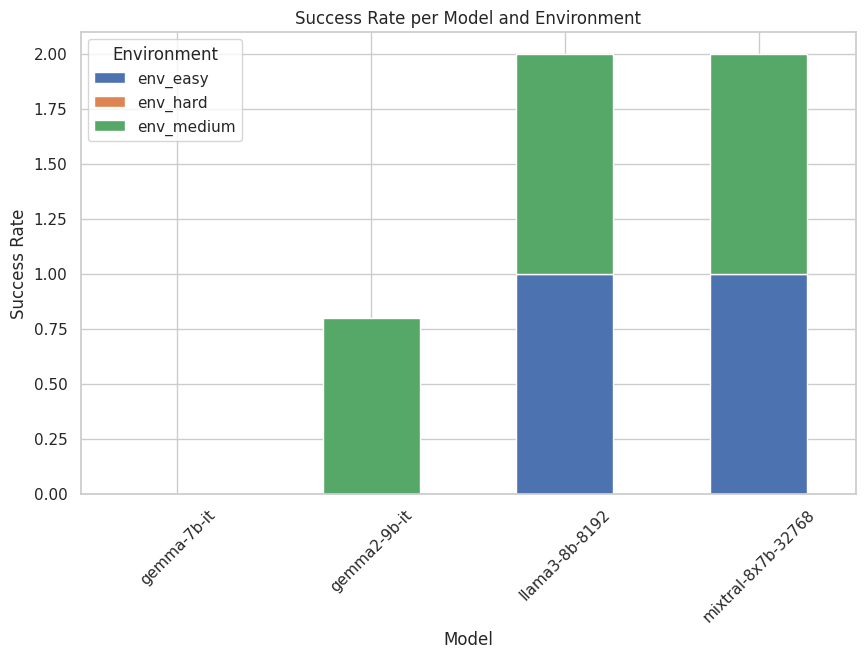

In [19]:
# Plot 2: Success Rate
# First, calculate success rate as the mean of the Score column
success_rate = df.groupby(['Model', 'Environment'])['Score'].mean().unstack()
success_rate.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Success Rate per Model and Environment')
plt.ylabel('Success Rate')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Environment')
plt.show()